In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('bags.csv')
df.head()

,index,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,0,bags,Portefeuilles,Gaine multi-outils en cuir véritable EDC ceint...,22.99,45.00,USD,49,174,False,...,Noir,café,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/chic-wallet-3614/p-1704...,1704506,SKUF57496
1,1,bags,Portefeuilles,"Sac ceinture EDC Retro en cuir véritable 7,2 p...",23.42,41.87,USD,44,377,False,...,Brown,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/e-ekphero-chic-wallet-3...,1644205,SKUE46942
2,2,bags,Portefeuilles,Sac de taille de téléphone en cuir véritable d...,21.99,40.00,USD,45,192,False,...,Black,Coffee,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/chic-wallet-3614/p-1689...,1689612,SKUF31609
3,3,bags,Portefeuilles,"EDC en cuir véritable rétro 6,3 pouces sac de ...",19.99,66.63,USD,70,207,False,...,Noir,marron,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/e-ekphero-chic-wallet-3...,1676960,SKUF18782
4,4,bags,Sacs à main,Sac à bandoulière en toile imprimé fleur pour ...,33.99,67.00,USD,49,218,False,...,Bleu,Bleu foncé,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/handbags-3609/p-1697644...,1697644,SKUF51272


In [123]:
df.columns

Index(['index', 'category', 'subcategory', 'name', 'current_price',
       'raw_price', 'currency', 'discount', 'likes_count', 'is_new', 'brand',
       'brand_url', 'codCountry', 'variation_0_color', 'variation_1_color',
       'variation_0_thumbnail', 'variation_0_image', 'variation_1_thumbnail',
       'variation_1_image', 'image_url', 'url', 'id', 'model'],
      dtype='object')

In [124]:
df.shape

(6268, 23)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6268 non-null   int64  
 1   category               6268 non-null   object 
 2   subcategory            6268 non-null   object 
 3   name                   6268 non-null   object 
 4   current_price          6268 non-null   float64
 5   raw_price              6268 non-null   float64
 6   currency               6268 non-null   object 
 7   discount               6268 non-null   int64  
 8   likes_count            6268 non-null   int64  
 9   is_new                 6268 non-null   bool   
 10  brand                  684 non-null    object 
 11  brand_url              584 non-null    object 
 12  codCountry             5015 non-null   object 
 13  variation_0_color      6196 non-null   object 
 14  variation_1_color      5707 non-null   object 
 15  vari

In [126]:
df.isnull().sum()/df.shape[0]

index                    0.000000
category                 0.000000
subcategory              0.000000
name                     0.000000
current_price            0.000000
raw_price                0.000000
currency                 0.000000
discount                 0.000000
likes_count              0.000000
is_new                   0.000000
brand                    0.890874
brand_url                0.906828
codCountry               0.199904
variation_0_color        0.011487
variation_1_color        0.089502
variation_0_thumbnail    0.011487
variation_0_image        0.011487
variation_1_thumbnail    0.089502
variation_1_image        0.089502
image_url                0.000000
url                      0.000000
id                       0.000000
model                    0.000000
dtype: float64

In [127]:
df.apply(pd.isnull).sum()

index                       0
category                    0
subcategory                 0
name                        0
current_price               0
raw_price                   0
currency                    0
discount                    0
likes_count                 0
is_new                      0
brand                    5584
brand_url                5684
codCountry               1253
variation_0_color          72
variation_1_color         561
variation_0_thumbnail      72
variation_0_image          72
variation_1_thumbnail     561
variation_1_image         561
image_url                   0
url                         0
id                          0
model                       0
dtype: int64

In [128]:
df=df.drop(columns=['index','name','brand','brand_url','codCountry','variation_0_color','variation_1_color',
                'variation_0_thumbnail','variation_0_image','variation_1_thumbnail','variation_1_image',
                 'image_url', 'url', 'id', 'model'],axis=1)

In [129]:
df.head()

,category,subcategory,current_price,raw_price,currency,discount,likes_count,is_new
0,bags,Portefeuilles,22.99,45.00,USD,49,174,False
1,bags,Portefeuilles,23.42,41.87,USD,44,377,False
2,bags,Portefeuilles,21.99,40.00,USD,45,192,False
3,bags,Portefeuilles,19.99,66.63,USD,70,207,False
4,bags,Sacs à main,33.99,67.00,USD,49,218,False


In [130]:
df.isnull().sum()

category         0
subcategory      0
current_price    0
raw_price        0
currency         0
discount         0
likes_count      0
is_new           0
dtype: int64

In [131]:
for column in df.columns:
    print(f'{column}:{df[column].nunique()}')

category:1
subcategory:16
current_price:1611
raw_price:2599
currency:1
discount:86
likes_count:852
is_new:2


In [132]:
df.drop(columns=['category','currency'],axis='columns',inplace=True)

In [133]:
df.head()

,subcategory,current_price,raw_price,discount,likes_count,is_new
0,Portefeuilles,22.99,45.00,49,174,False
1,Portefeuilles,23.42,41.87,44,377,False
2,Portefeuilles,21.99,40.00,45,192,False
3,Portefeuilles,19.99,66.63,70,207,False
4,Sacs à main,33.99,67.00,49,218,False


In [134]:
df.shape

(6268, 6)

In [135]:
for column in df.columns:
    print(f'{column}:{df[column].unique()}')
    print('============================================================')

subcategory:['Portefeuilles' 'Sacs à main' 'Sac bandoulière' 'Sacs à dos' 'Sacs chic'
 'Pochettes & Clutches' 'Cosmetic Bags' "Men's Bags"
 'Sacs de rangement & Trousses' 'Sacs de voyage' 'Pochettes'
 'Sacs cosmétiques' 'Étui & Sac des monnaies' 'Porte-documents'
 'Bag Accessories' 'Sacs pour stockage des fournitures digitales']
current_price:[22.99 23.42 21.99 ...  9.05 33.81  7.79]
raw_price:[45.   41.87 40.   ... 15.66 82.86 19.11]
discount:[49 44 45 70 53 56 51 67 50 31 41 39 48 46 57 29 37 69 47 55 52 42 74 36
 40 54 62 65 75 43 78 60 59 58 61 63 38 79 68 64 73 66 83 32 72 10 19 84
 24 76 33 35 26 18 71 34 21 86 30 15 80 23  0  8 27 11  9 25 12 20 17 22
 77 90 81 87 14  5 28 88 16 85 91 89 82 92]
likes_count:[ 174  377  192  207  218   66   90  779   54   93   60   76   30 9465
 1645  233   82   70   16   55 1053   48  416   39   17  463 4517  402
 1580   18 5571   75   35   37 1126 1575  690   19  537   21  148   10
   12  734  202 1964  240  139  212   51  304  124   26    8  16

In [136]:
df.describe()

,current_price,raw_price,discount,likes_count
count,6268.000000,6268.000000,6268.000000,6268.000000
mean,27.972645,58.896988,51.843172,201.002234
std,17.020444,36.393879,9.659438,530.008912
min,1.640000,0.000000,0.000000,0.000000
25%,15.990000,34.990000,46.000000,29.750000
50%,23.870000,49.990000,52.000000,70.000000
75%,35.410000,73.410000,58.000000,166.000000
max,166.930000,544.870000,92.000000,9465.000000


In [137]:
df.groupby('subcategory').mean(numeric_only=True)

,current_price,raw_price,discount,likes_count,is_new
subcategory,,,,,
Bag Accessories,9.210000,17.632857,48.071429,180.500000,0.000000
Cosmetic Bags,16.293803,33.082958,51.084507,397.140845,0.000000
Men's Bags,22.151964,47.041429,54.625000,52.964286,0.000000
Pochettes,31.296500,57.824000,46.600000,167.550000,0.000000
Pochettes & Clutches,17.901786,42.458214,56.035714,256.642857,0.035714
Porte-documents,57.395952,121.281429,50.571429,142.404762,0.023810
Portefeuilles,21.169835,43.357742,51.168459,116.227240,0.048029
Sac bandoulière,29.110832,61.613390,52.414333,193.610791,0.007002
Sacs chic,18.789792,42.024649,52.875325,49.103896,0.070130


In [138]:
df.groupby('is_new').mean(numeric_only=True)

,current_price,raw_price,discount,likes_count
is_new,,,,
False,28.059011,59.047554,51.816871,206.331859
True,24.737914,53.257669,52.828221,1.386503


In [139]:
df['is_new'].value_counts()

is_new
False    6105
True      163
Name: count, dtype: int64

In [140]:
df.drop(columns=['is_new'],axis=1,inplace=True)

In [141]:
df.sample(5)

,subcategory,current_price,raw_price,discount,likes_count
5228,Cosmetic Bags,14.71,41.99,65,2362
5200,Sac bandoulière,16.09,39.83,60,111
5508,Sacs à dos,29.62,69.83,58,257
1966,Sac bandoulière,34.99,65.99,47,45
1578,Sac bandoulière,26.69,52.49,49,99


In [142]:
categorical_columns,numerical_columns=[],[]
for column in df.columns:
    if df[column].dtype=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [143]:
categorical_columns

['subcategory']

In [144]:
numerical_columns

['current_price', 'raw_price', 'discount', 'likes_count']

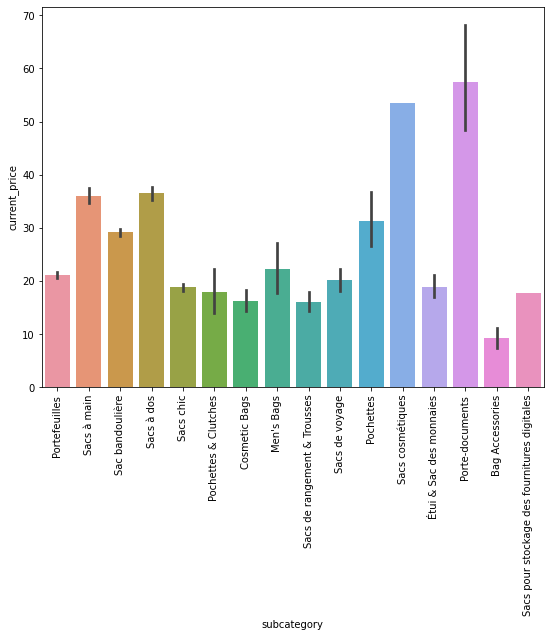

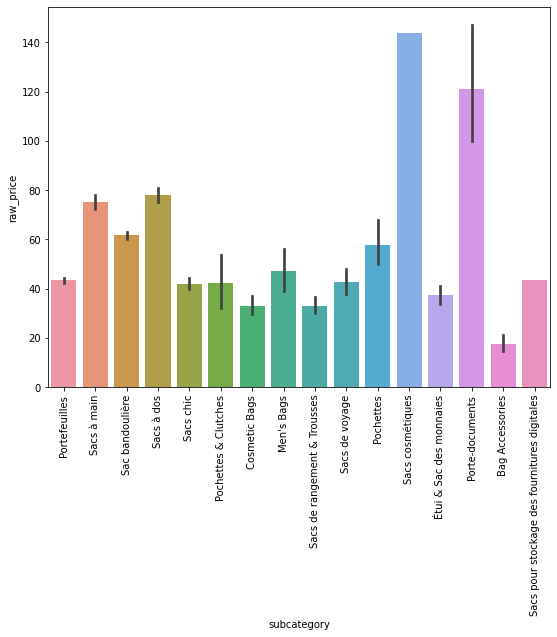

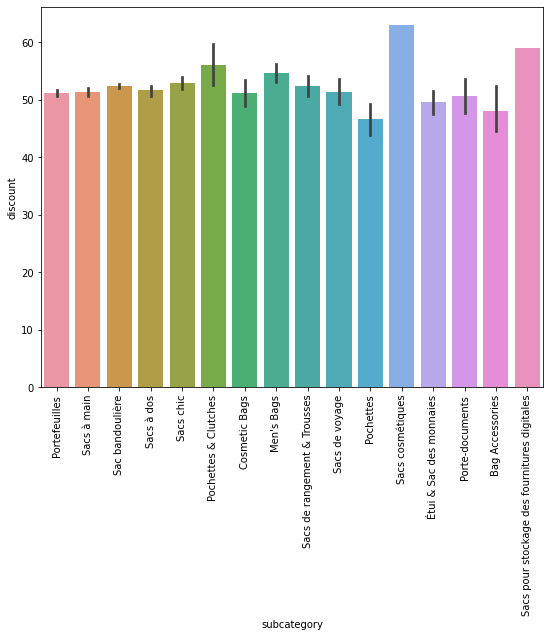

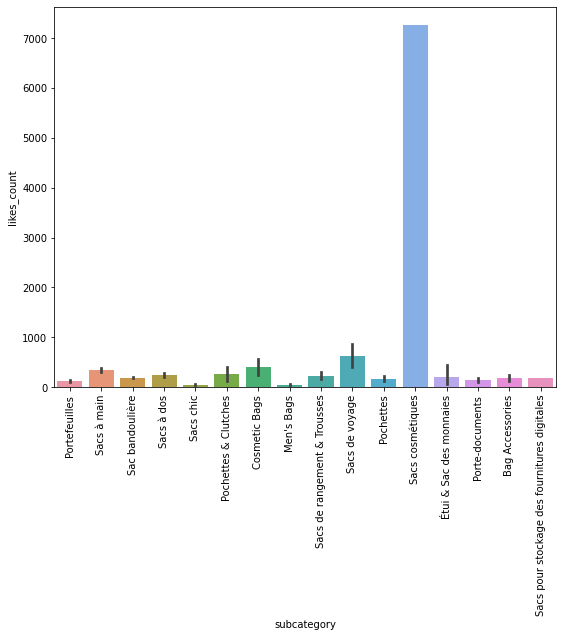

In [145]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=df,x=i,y=j)
        plt.xticks(rotation=90)
        plt.show()

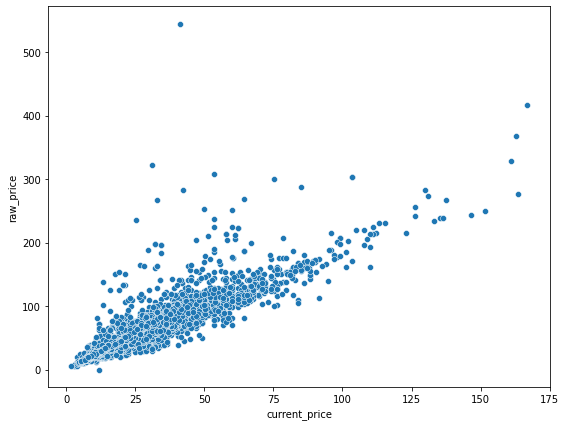

In [146]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='current_price',y='raw_price')
plt.show()

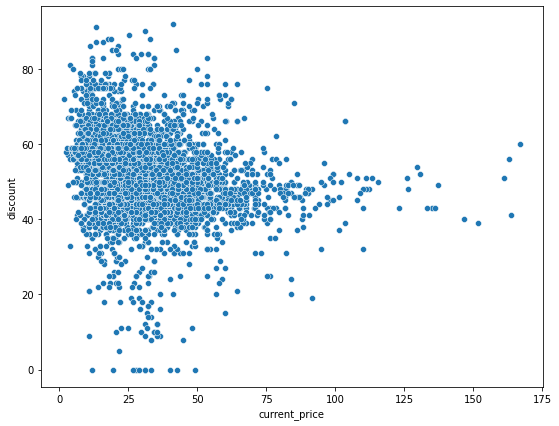

In [147]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='current_price',y='discount')
plt.show()

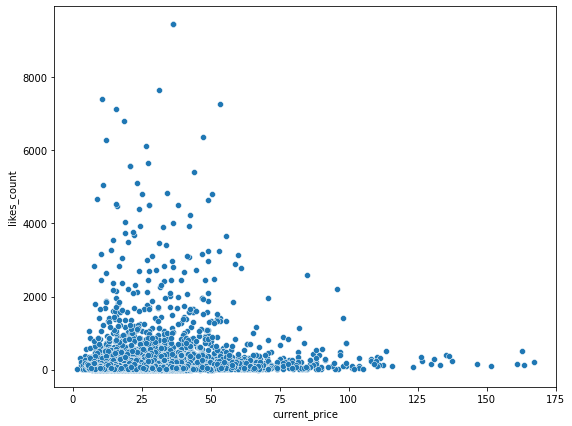

In [148]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='current_price',y='likes_count')
plt.show()

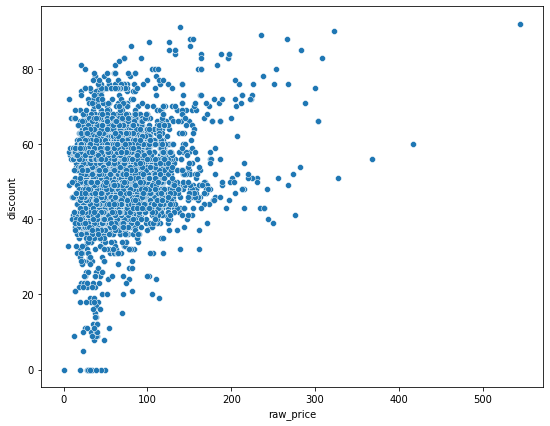

In [149]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='raw_price',y='discount')
plt.show()

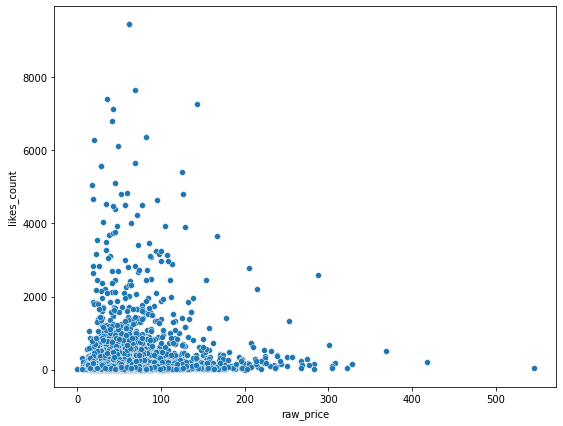

In [150]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='raw_price',y='likes_count')
plt.show()

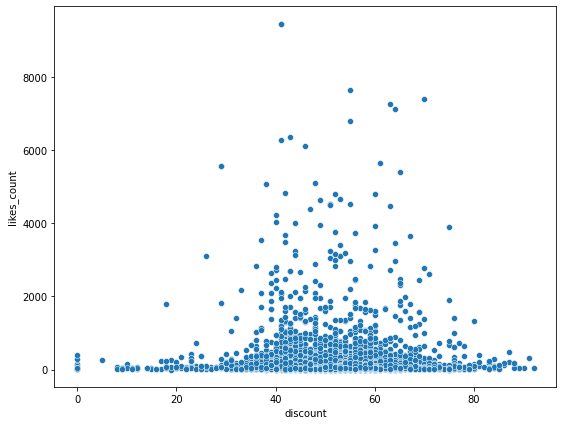

In [151]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='discount',y='likes_count')
plt.show()

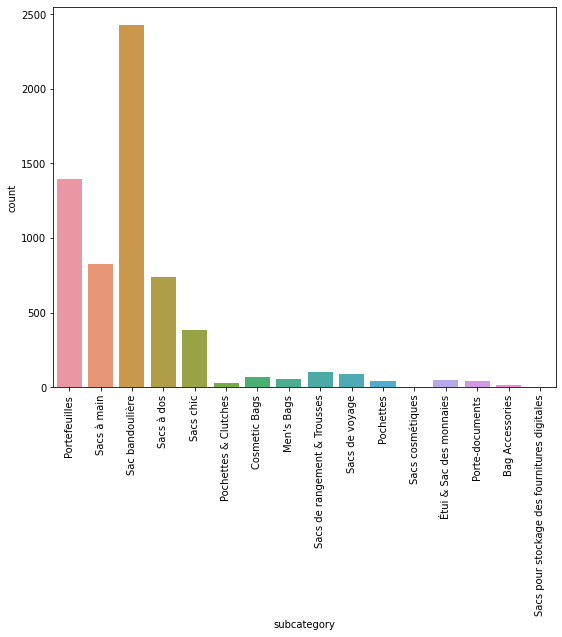

In [152]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='subcategory')
plt.xticks(rotation=90)
plt.show()

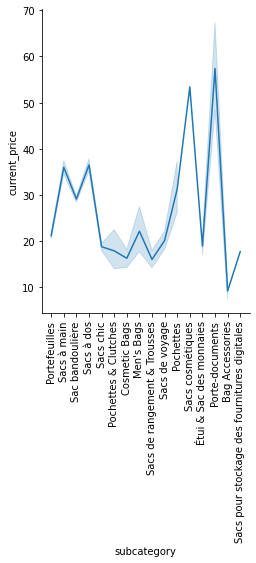

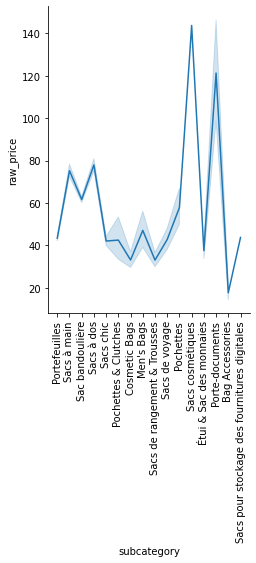

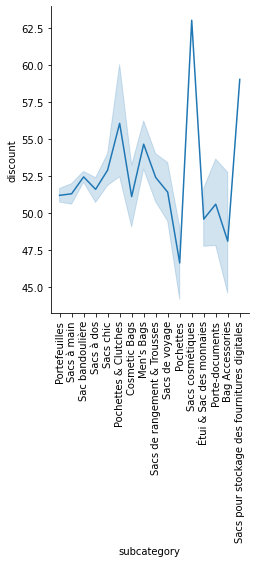

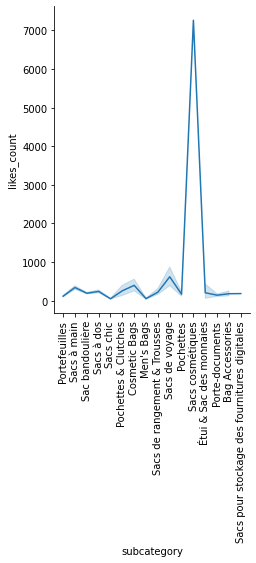

In [153]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.relplot(data=df,x=i,y=j,kind='line')
        plt.xticks(rotation=90)
        plt.show()

In [154]:
cols1=['raw_price','discount','likes_count']

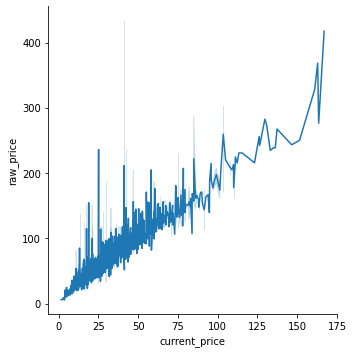

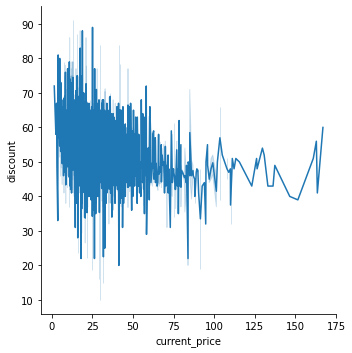

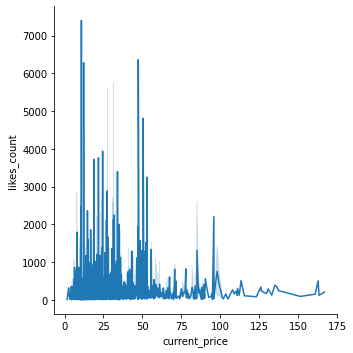

In [155]:
for i in cols1:
    sns.relplot(data=df,x='current_price',y=i,kind='line')
    plt.show()

In [156]:
cols2=['discount','likes_count']

<Figure size 648x504 with 0 Axes>

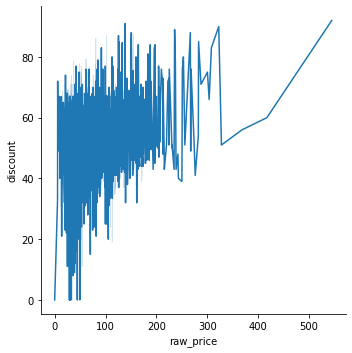

<Figure size 648x504 with 0 Axes>

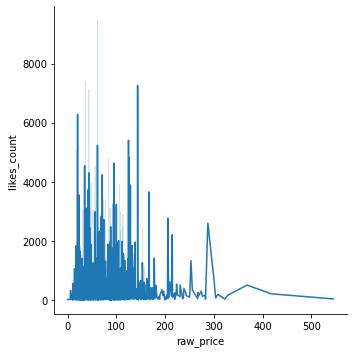

In [157]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.relplot(data=df,x='raw_price',y=i,kind='line')
    plt.show()

<Figure size 648x504 with 0 Axes>

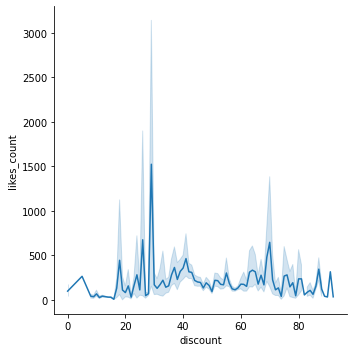

In [158]:
plt.figure(figsize=(9,7))
sns.relplot(data=df,x='discount',y='likes_count',kind='line')
plt.show()

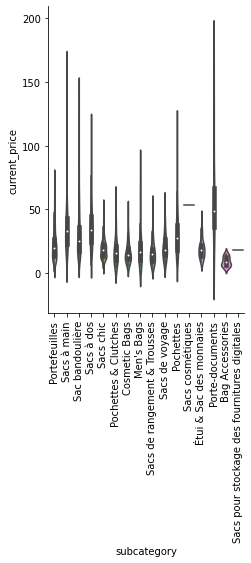

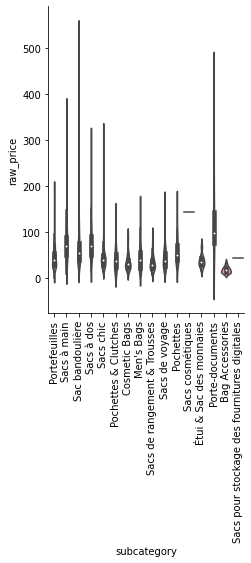

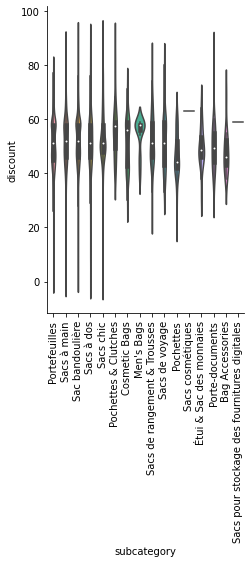

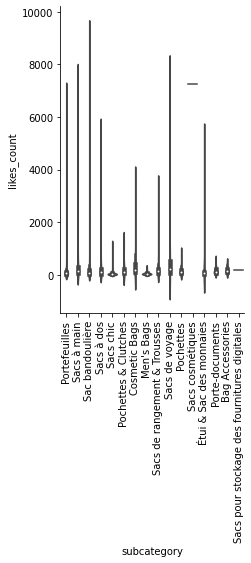

In [159]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.catplot(data=df,x=i,y=j,kind='violin')
        plt.xticks(rotation=90)
        plt.show()

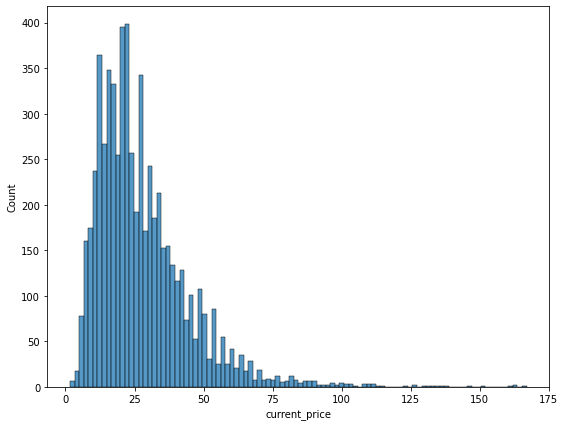

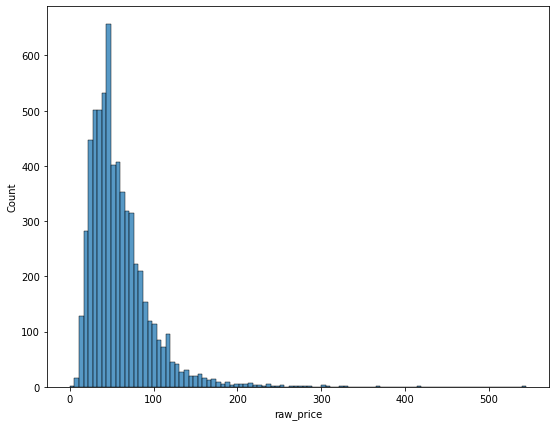

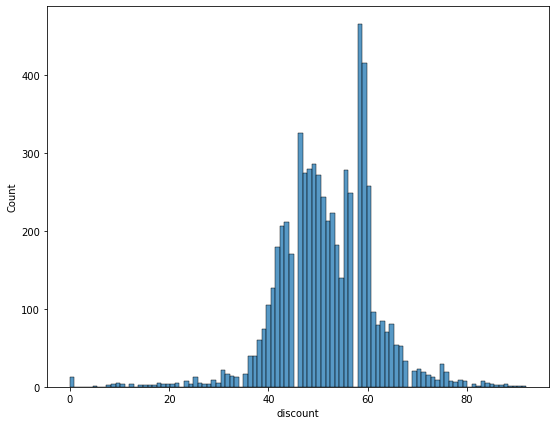

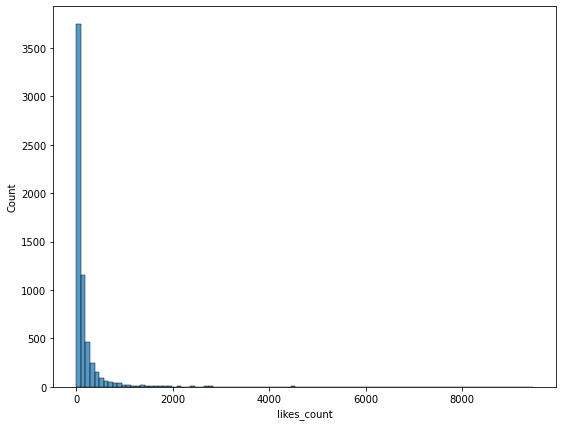

In [160]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.histplot(data=df,x=column,bins=100)
    plt.show()

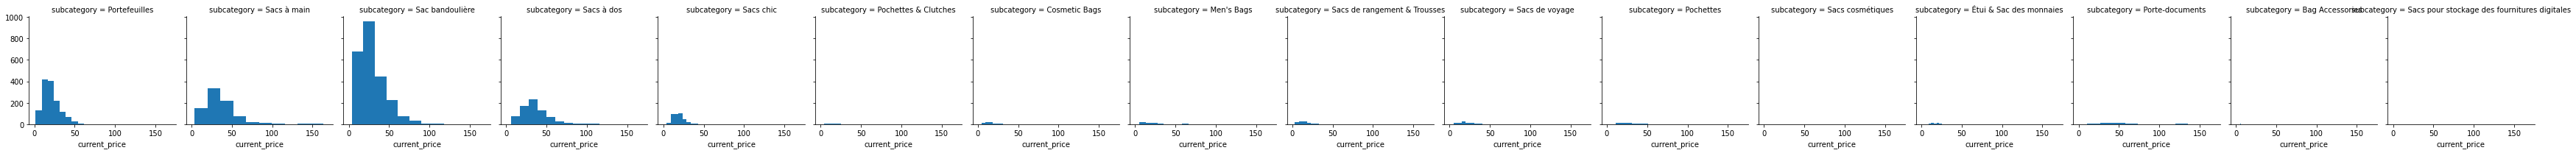

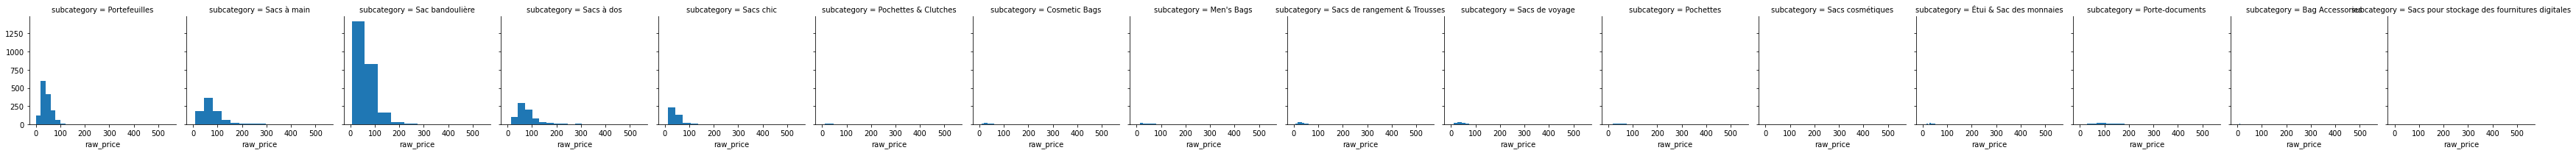

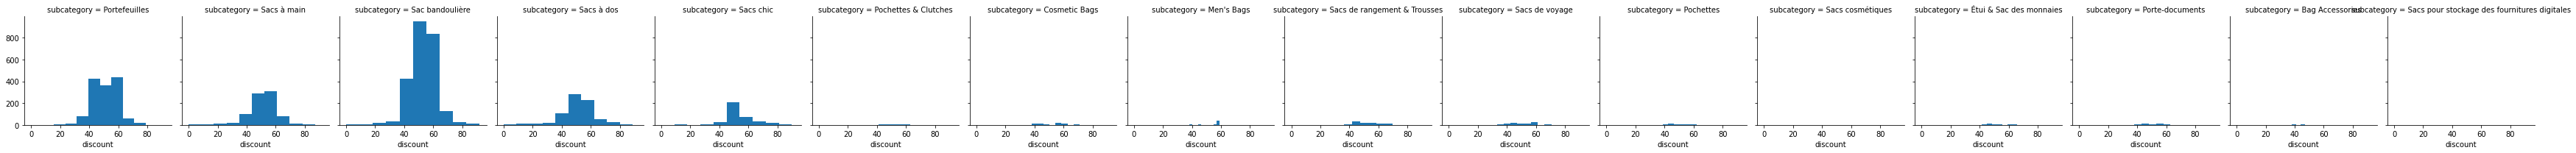

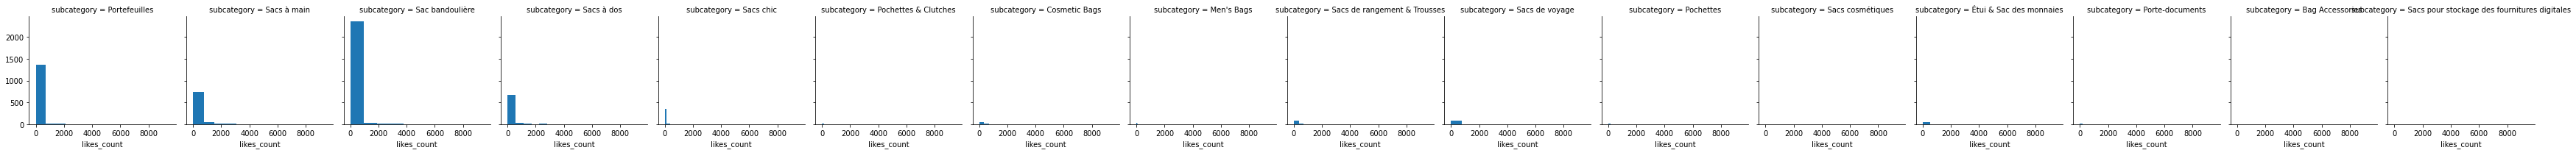

In [161]:
for i in categorical_columns:
    for j in numerical_columns:
        b=sns.FacetGrid(data=df,col=i)
        b.map(plt.hist,j)
        plt.show()

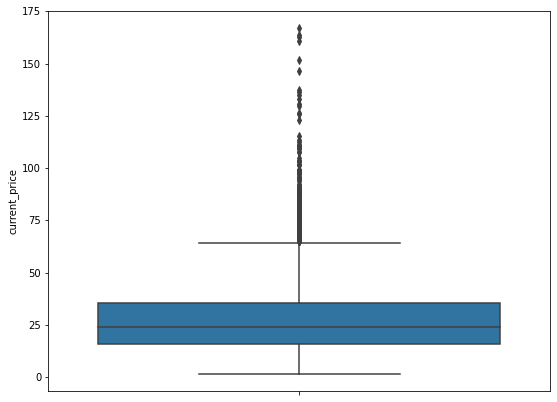

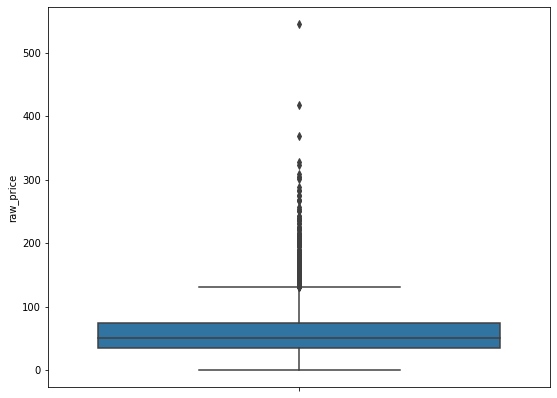

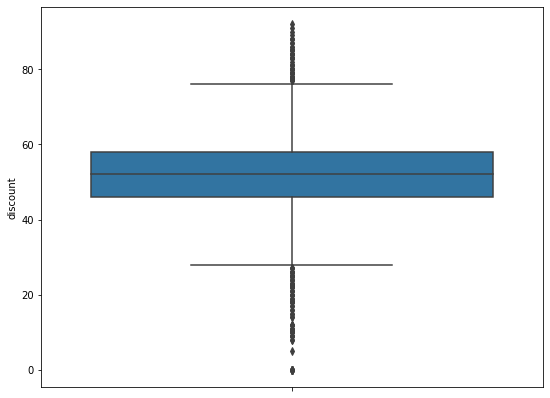

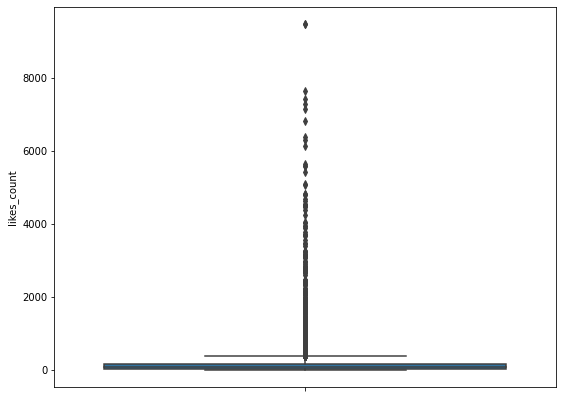

In [162]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=i)
    plt.show()

In [163]:
df.shape

(6268, 5)

In [164]:
df[df['current_price']>60].shape

(287, 5)

In [165]:
df=df[df['current_price']<60]

In [166]:
df[df['raw_price']>110].shape

(217, 5)

In [167]:
df=df[df['raw_price']<110]

In [168]:
df[df['discount']>72].shape

(85, 5)

In [169]:
df=df[df['discount']<72]

In [170]:
df[df['discount']<28].shape

(85, 5)

In [171]:
df=df[df['discount']>28]

In [172]:
df[df['likes_count']>300].shape

(742, 5)

In [173]:
df=df[df['likes_count']<300]

In [174]:
df.shape

(4834, 5)

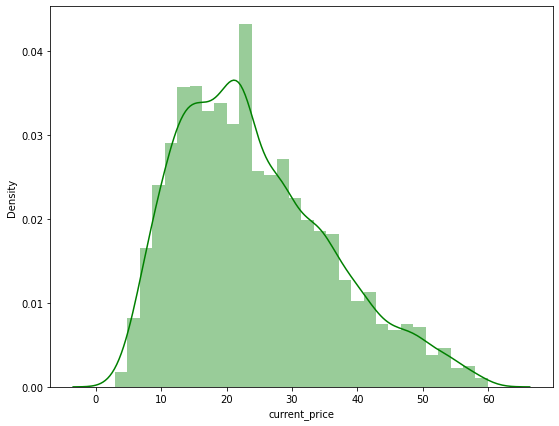

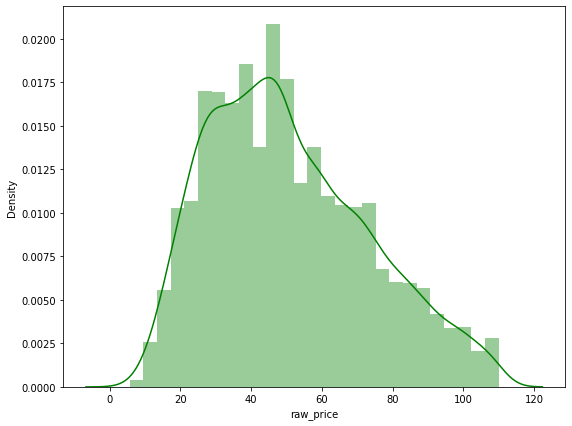

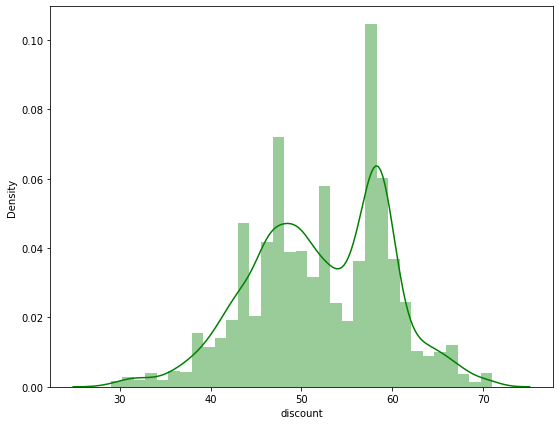

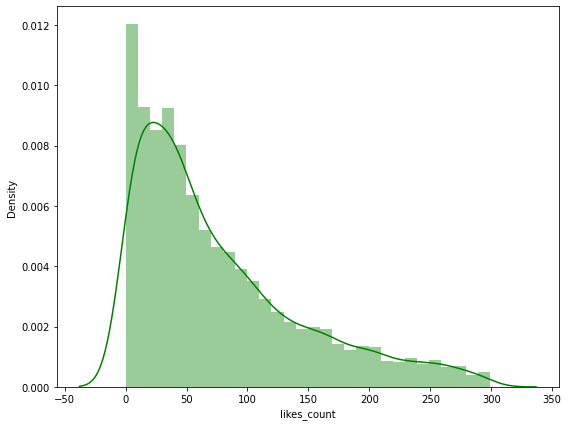

In [175]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.distplot(df[column],color='green')
    plt.show()

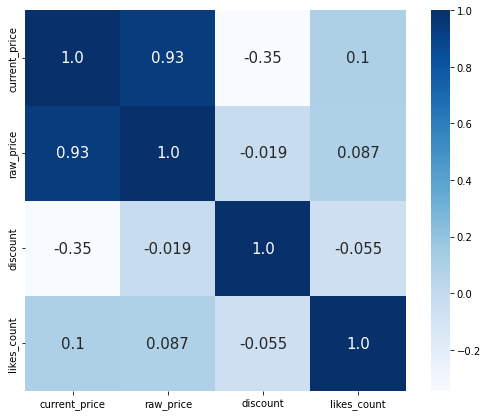

In [176]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [177]:
df1=df.copy()

In [178]:
df1.sample(5)

,subcategory,current_price,raw_price,discount,likes_count
5934,Sac bandoulière,7.99,14.99,47,155
1498,Sacs à main,40.99,78.99,48,247
2654,Sacs à main,38.14,64.35,41,247
3073,Sacs à main,5.99,12.00,50,10
4195,Portefeuilles,27.78,48.67,43,38


In [179]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
    ('std_scaler',StandardScaler())
])

In [180]:
df2=pipeline.fit_transform(df[['current_price','likes_count']])

In [181]:
df2

array([[-0.11691561,  1.41867356],
       [-0.20304253,  1.68017804],
       [-0.37529637,  1.89809845],
       ...,
       [-0.26849899, -0.23752152],
       [-1.42604483,  1.57848185],
       [-0.89205791, -0.52808206]])

In [182]:
c=range(2,11)
inertia,sil=[],[]
for i in c:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
    sil_score=silhouette_score(df2,kmeans.labels_)
    sil.append(sil_score)

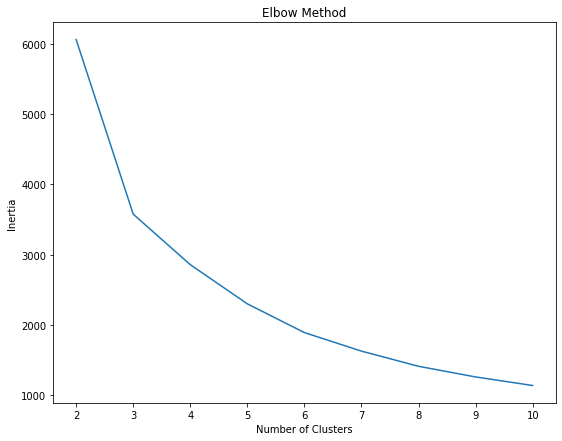

In [183]:
plt.figure(figsize=(9,7))
sns.lineplot(x=c,y=inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

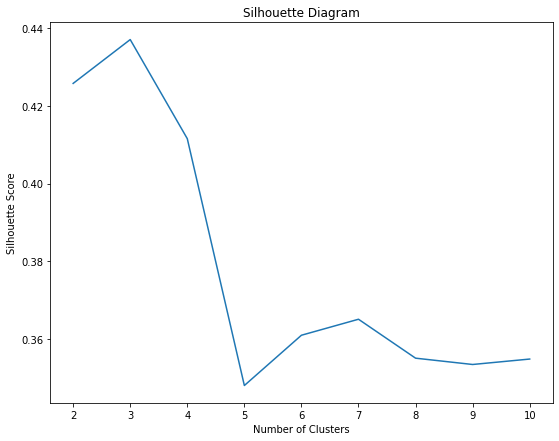

In [184]:
plt.figure(figsize=(9,7))
plt.plot(c,sil)
plt.title('Silhouette Diagram')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [185]:
kmeans_model=KMeans(n_clusters=4,init='k-means++')
predict=kmeans_model.fit_predict(df2)

In [186]:
predict

array([0, 0, 0, ..., 2, 0, 2])

In [187]:
df_kmeans=pd.DataFrame(data=df2,columns=['current_price','likes_count'])

In [188]:
df_kmeans

,current_price,likes_count
0,-0.116916,1.418674
1,-0.203043,1.680178
2,-0.375296,1.898098
3,0.830481,2.057907
4,-0.116916,-0.150353
...,...,...
4829,0.814978,-0.702418
4830,-0.375296,-0.876755
4831,-0.268499,-0.237522
4832,-1.426045,1.578482


In [189]:
df_kmeans['cluster']=predict

In [190]:
df_kmeans

,current_price,likes_count,cluster
0,-0.116916,1.418674,0
1,-0.203043,1.680178,0
2,-0.375296,1.898098,0
3,0.830481,2.057907,3
4,-0.116916,-0.150353,2
...,...,...,...
4829,0.814978,-0.702418,1
4830,-0.375296,-0.876755,2
4831,-0.268499,-0.237522,2
4832,-1.426045,1.578482,0


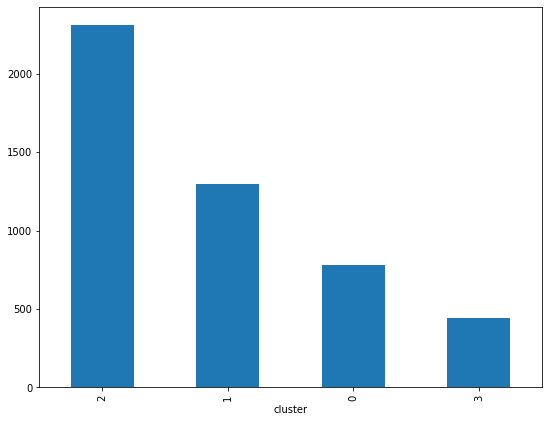

In [191]:
df_kmeans['cluster'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

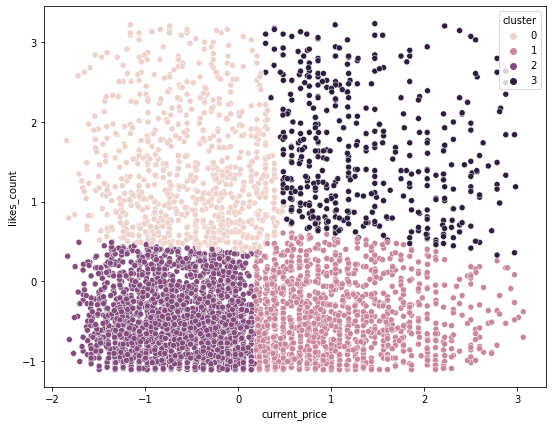

In [192]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df_kmeans,x='current_price',y='likes_count',hue='cluster')
plt.show()

In [193]:
df3=df.copy()

In [194]:
df3['cluster']=predict

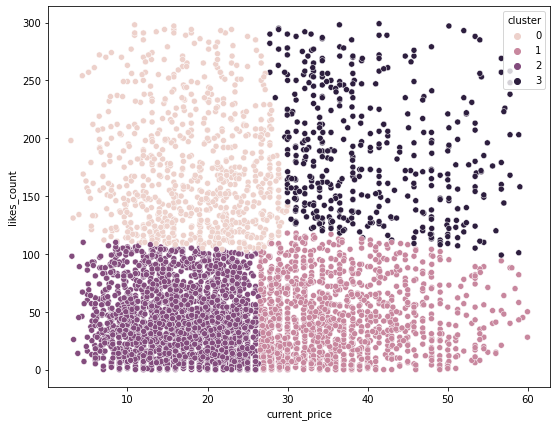

In [195]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df3,x='current_price',y='likes_count',hue='cluster')
plt.show()

In [196]:
df_agglo=df_kmeans.drop(columns=['cluster'],axis='columns')

In [202]:
d=range(2,11)
agg_inertia,agg_sil=[],[]
for i in d:
    agglo=AgglomerativeClustering(n_clusters=i,linkage='average')
    agglo.fit(df_agglo)
    sil_s=silhouette_score(df_agglo,agglo.labels_)
    agg_sil.append(sil_s)

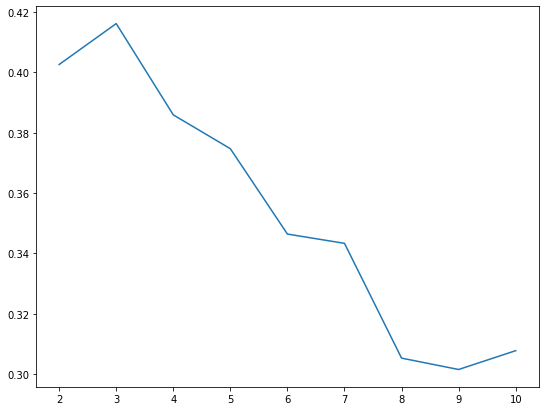

In [203]:
plt.figure(figsize=(9,7))
sns.lineplot(x=d,y=agg_sil)
plt.show()

In [231]:
agglo_model=AgglomerativeClustering(n_clusters=4,linkage='average')
agglo_model.fit(df_agglo)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [232]:
df_agglo['cluster']=agglo_model.labels_

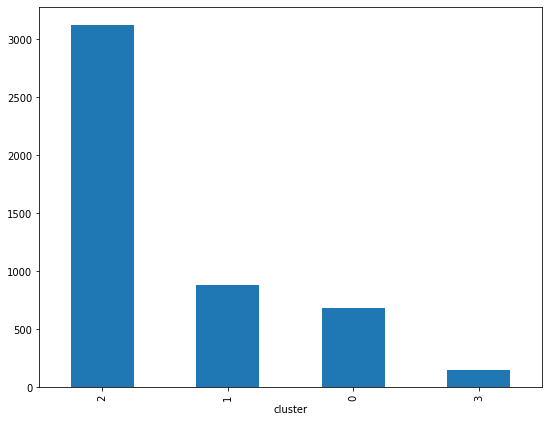

In [233]:
df_agglo['cluster'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

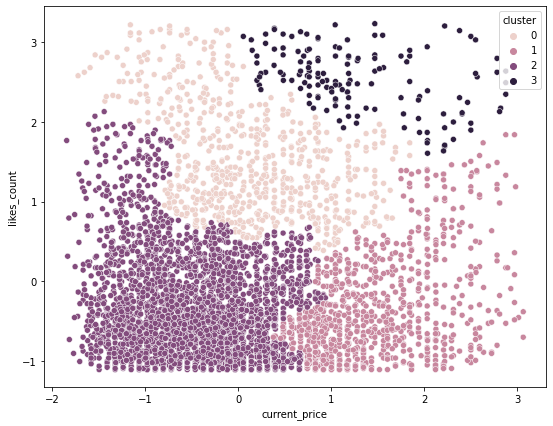

In [234]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df_agglo,x='current_price',y='likes_count',hue='cluster')
plt.show()

In [235]:
df3['agg_cluster']=agglo_model.labels_

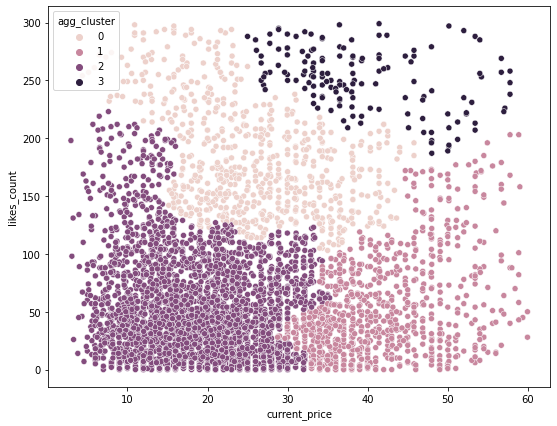

In [236]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df3,x='current_price',y='likes_count',hue='agg_cluster')
plt.show()